# Assignment 2 DAI-102
Arnav Garg
23117028

In [1]:
### Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


## Reading the assignment

In [2]:
df = pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Check for missing values

In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Encode all categorical columns to numerical

In [4]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


## Plotting various plots to check the nature of the data

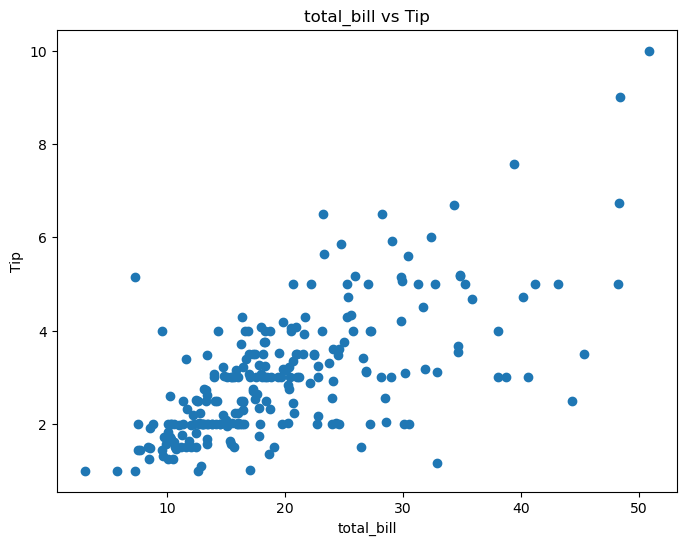

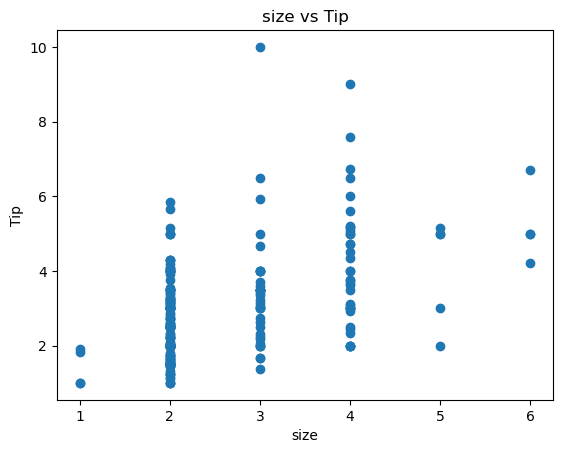

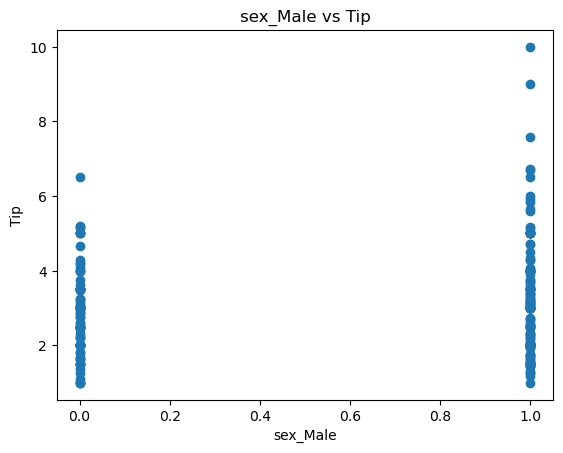

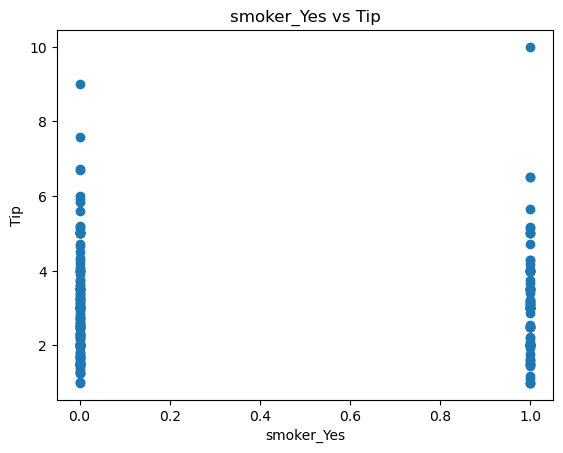

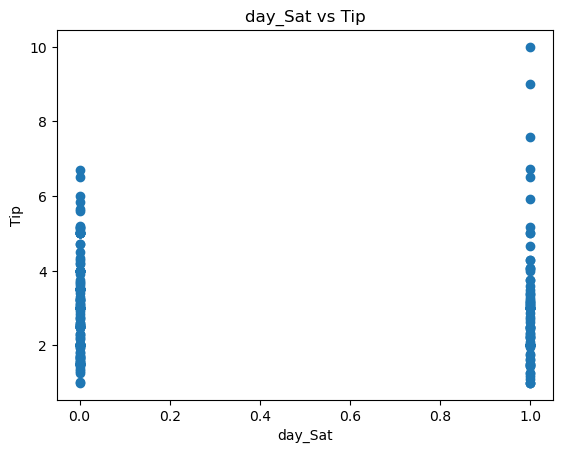

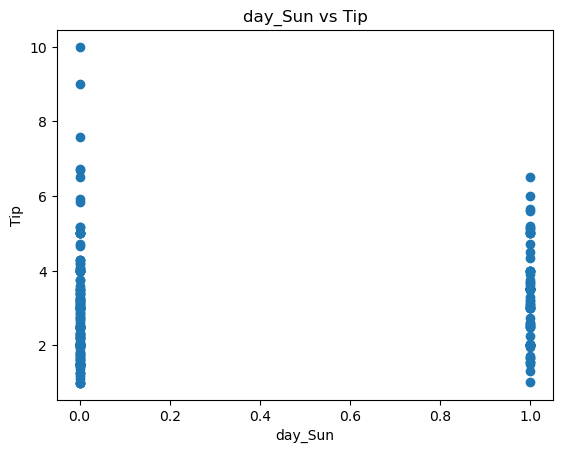

In [5]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']
plt.figure(figsize=(8, 6))
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

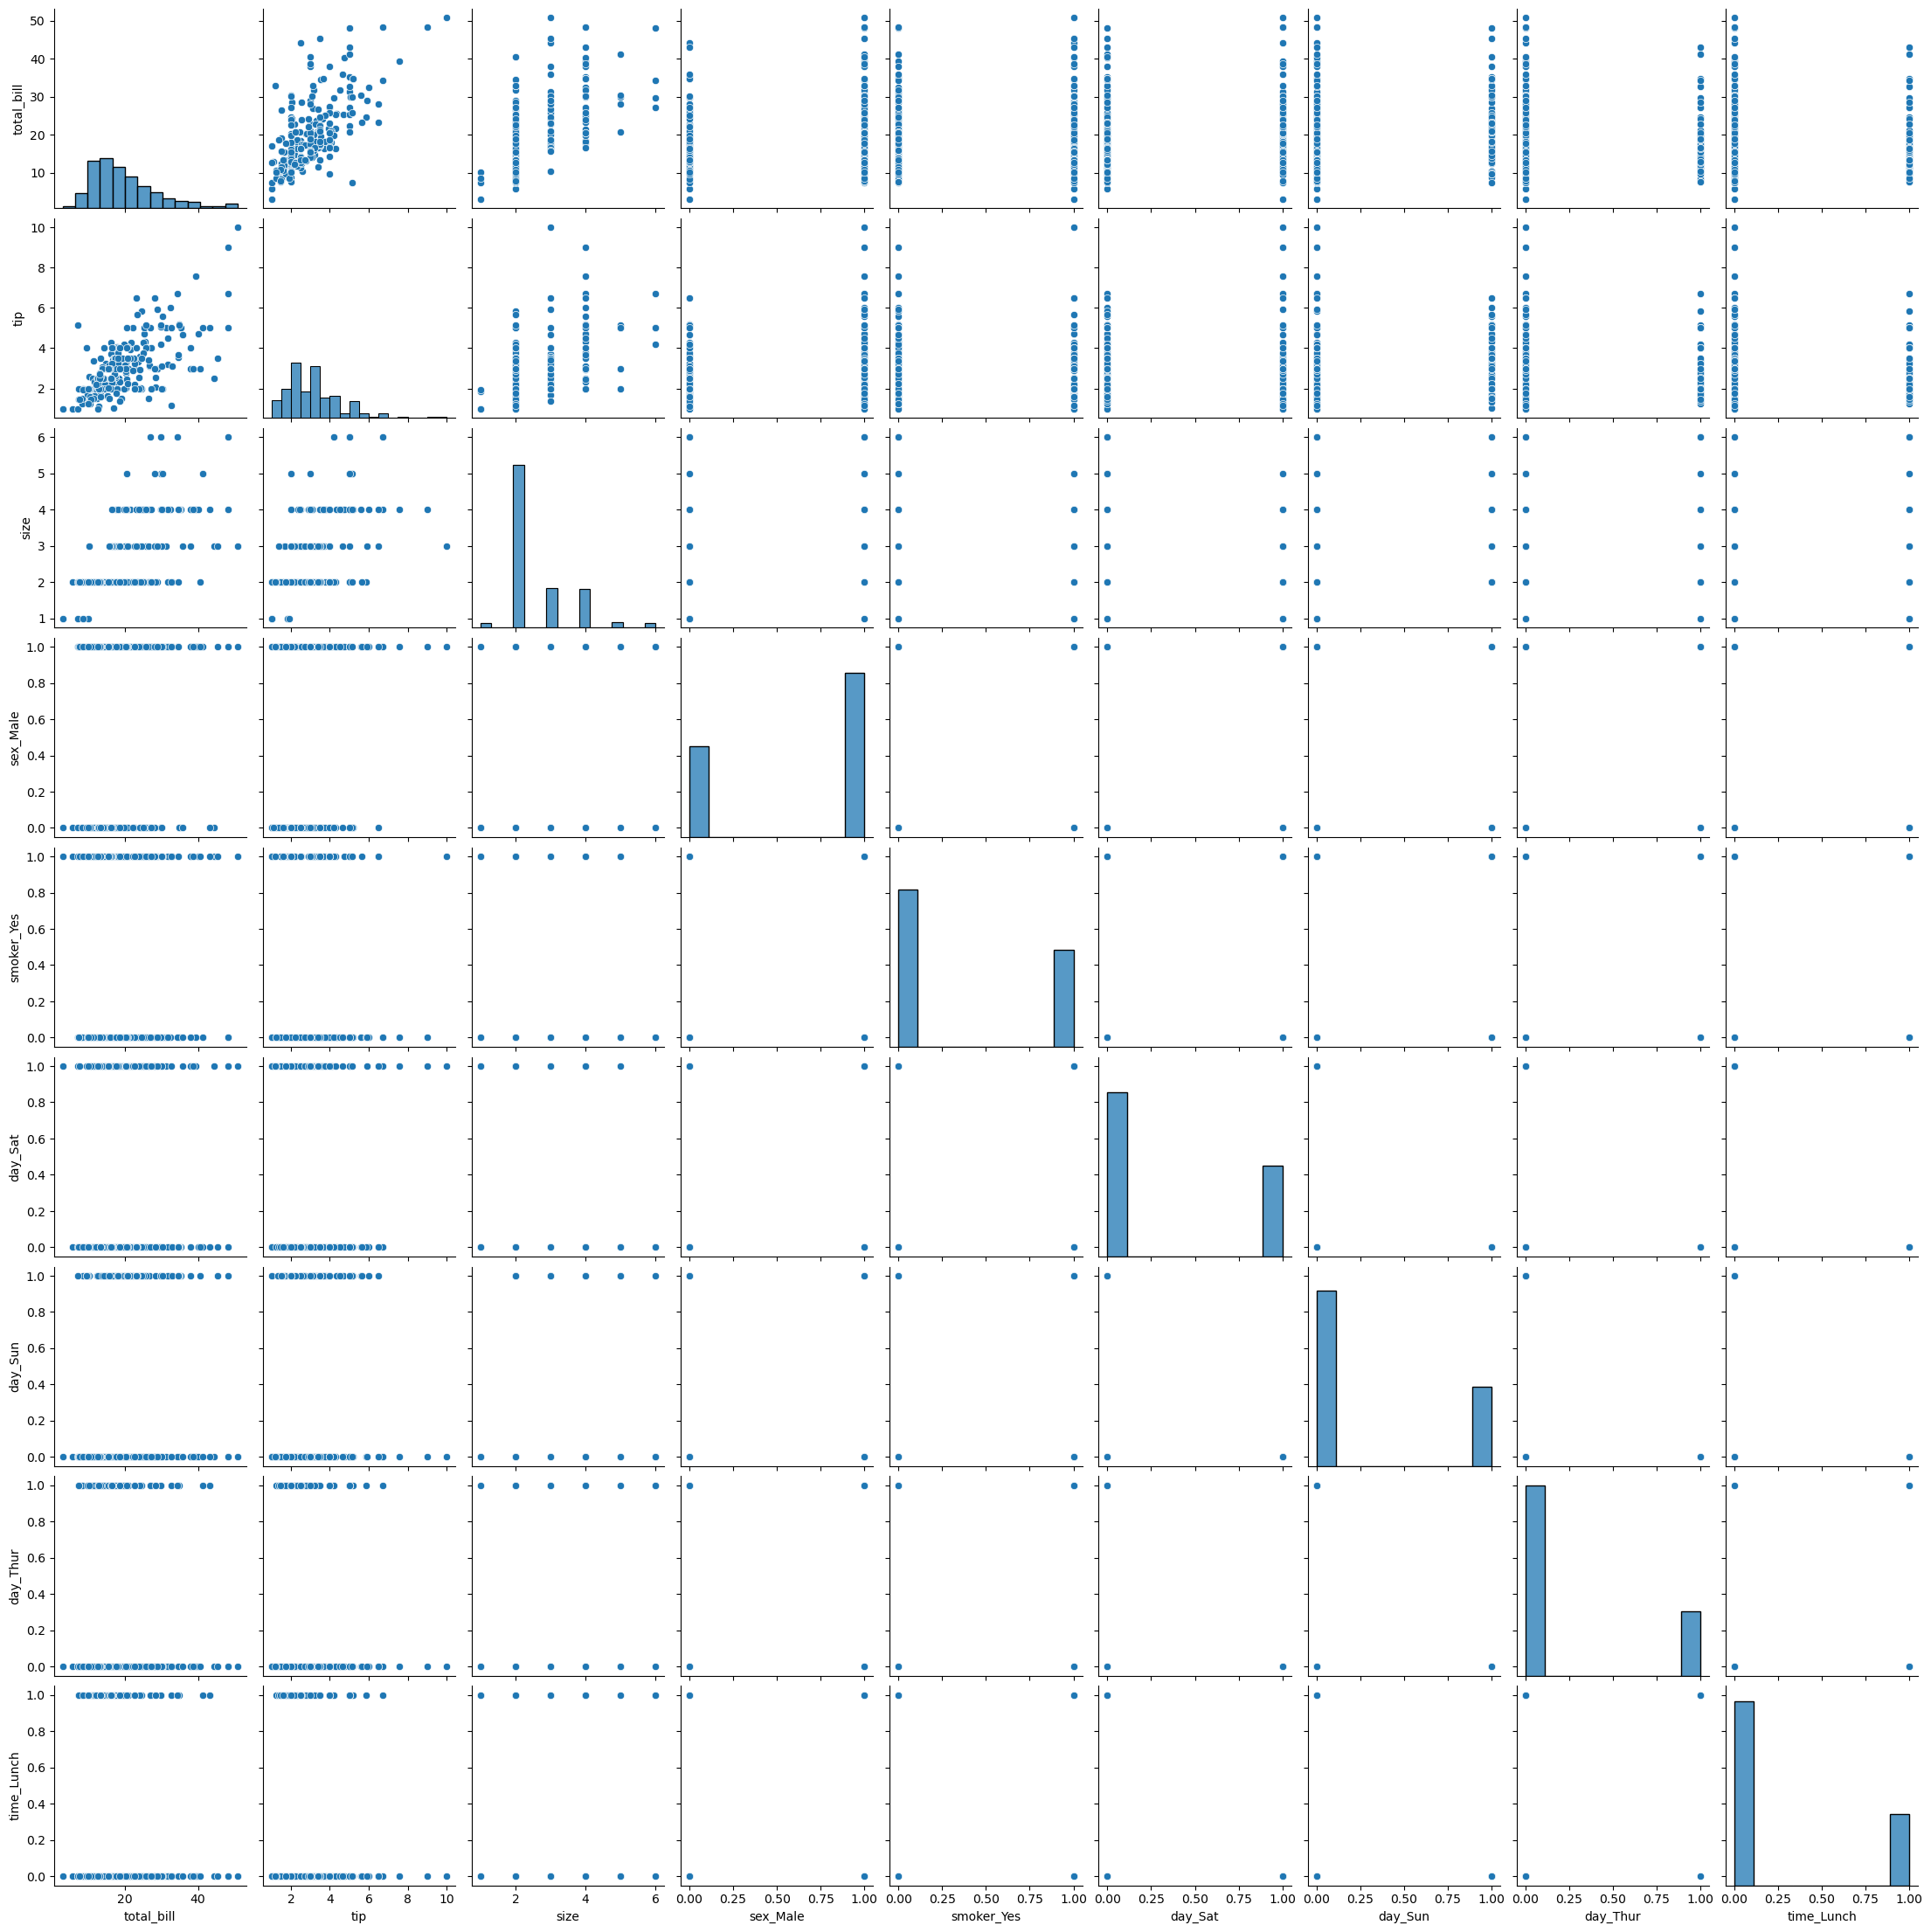

In [6]:
sns.pairplot(df)
plt.show()

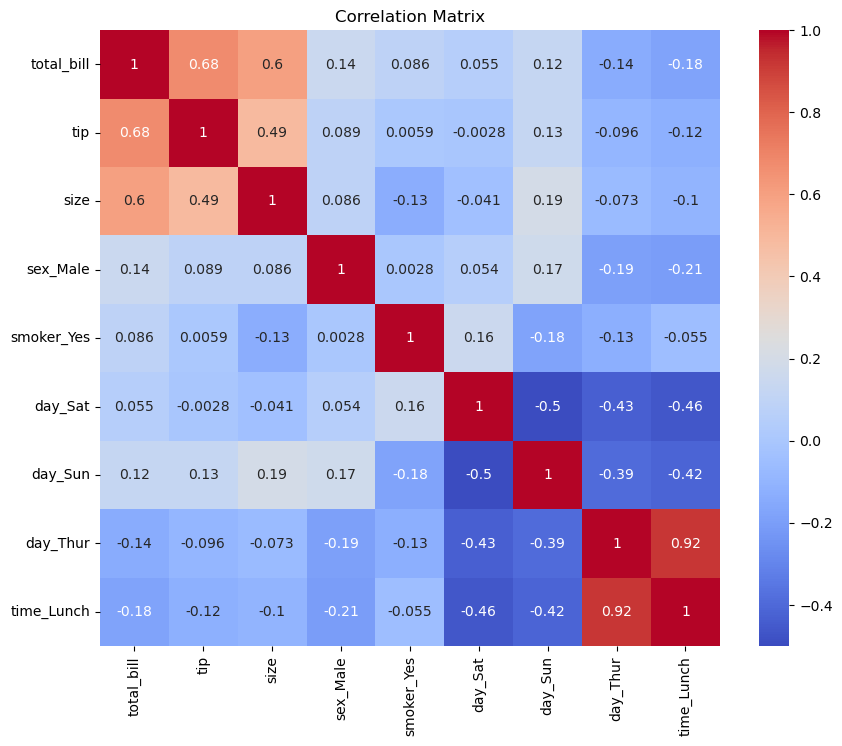

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Rainbow Test for Linearity
X = sm.add_constant(df['total_bill']) 
y = df['tip']
# Fitting an OLS regression model
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = sm.stats.linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.2291480226129023
Rainbow Test p-value: 0.1291192152551388


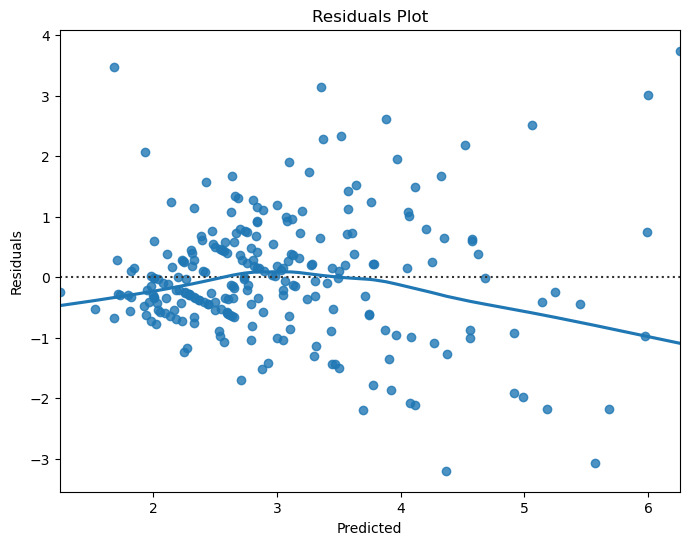

In [9]:
plt.figure(figsize=(8, 6))
sns.residplot(x=model.predict(X), y=y, lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [10]:
if rainbow_p_value > 0.05:
    print("The null hypothesis is not rejected, suggesting that the model likely has a linear relationship.")
else:
    print("The null hypothesis is rejected, indicating that the model might not follow a linear pattern.")

The null hypothesis is not rejected, suggesting that the model likely has a linear relationship.


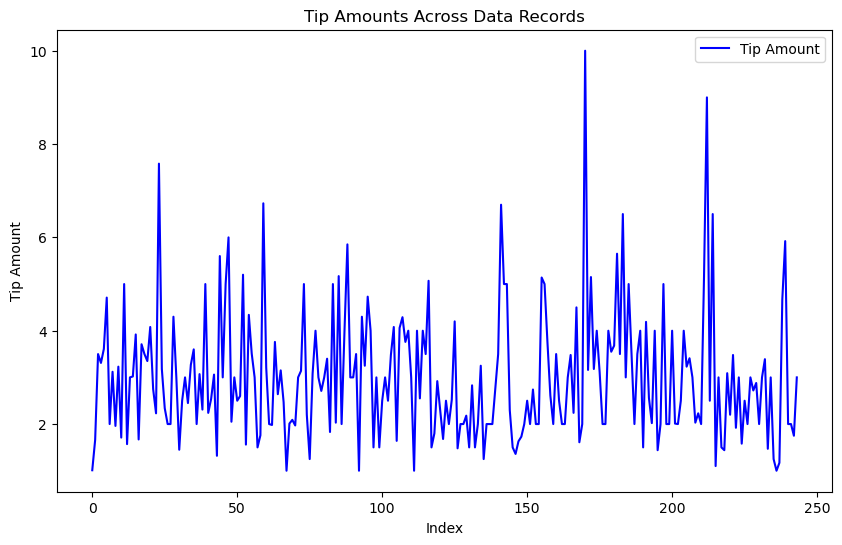

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tip'], label='Tip Amount', color='b')
plt.title('Tip Amounts Across Data Records')
plt.xlabel('Index')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()

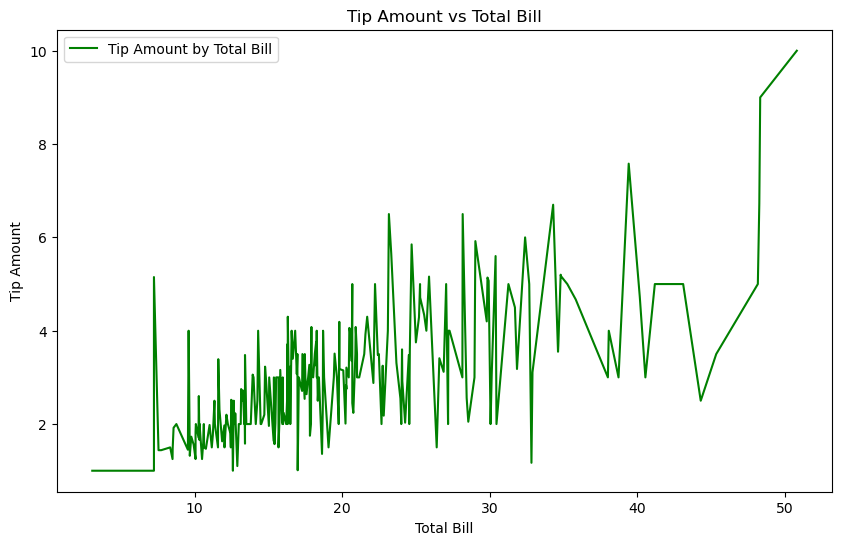

In [12]:
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], label='Tip Amount by Total Bill', color='g')
plt.title('Tip Amount vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()

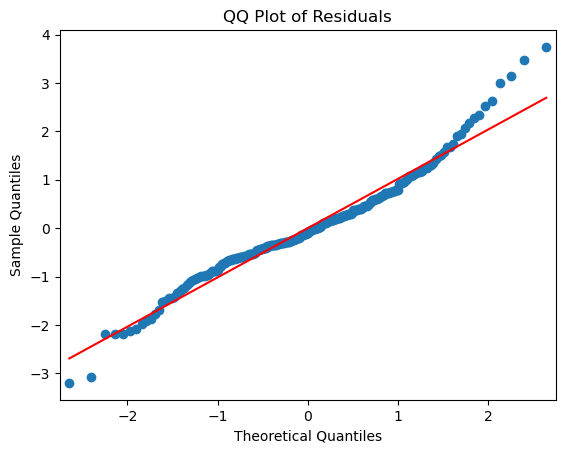

In [13]:
model = sm.OLS(y, X).fit()
qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [14]:

df_encoded = df.copy()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

In [15]:

encoder = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

In [16]:

X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [18]:

results = {}

In [19]:

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[model_name] = {'Mean Squared Error': mse, 'R Squared': r2, 'Root Mean Squared Error': rmse}

results_df = pd.DataFrame(results).T
print("Evaluation Results for Each Model:\n", results_df)

Evaluation Results for Each Model:
                            Mean Squared Error  R Squared  \
Linear Regression                    0.703357   0.437302   
Ridge Regression                     0.700748   0.439389   
Lasso Regression                     0.590853   0.527307   
Decision Tree                        1.255194  -0.004178   
Random Forest                        0.919672   0.264246   
Support Vector Regression            0.652453   0.478025   
K-Nearest Neighbors                  0.876373   0.298886   

                           Root Mean Squared Error  
Linear Regression                         0.838664  
Ridge Regression                          0.837107  
Lasso Regression                          0.768670  
Decision Tree                             1.120354  
Random Forest                             0.958995  
Support Vector Regression                 0.807746  
K-Nearest Neighbors                       0.936148  


In [20]:

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {model_name}")
    plt.show()

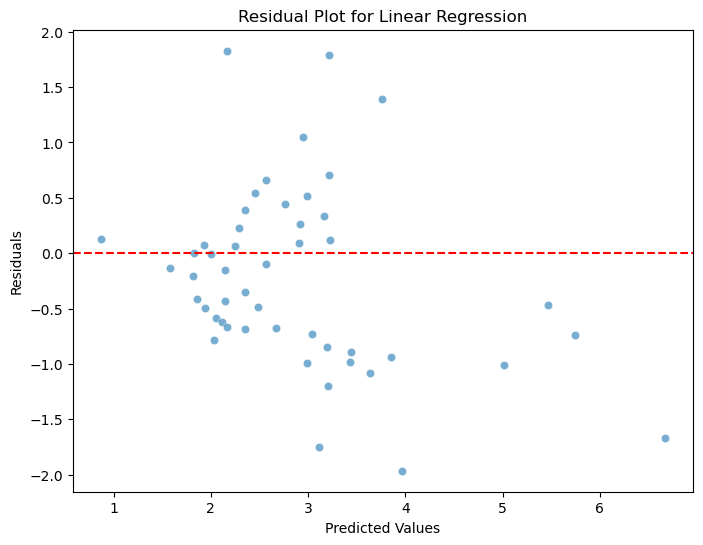

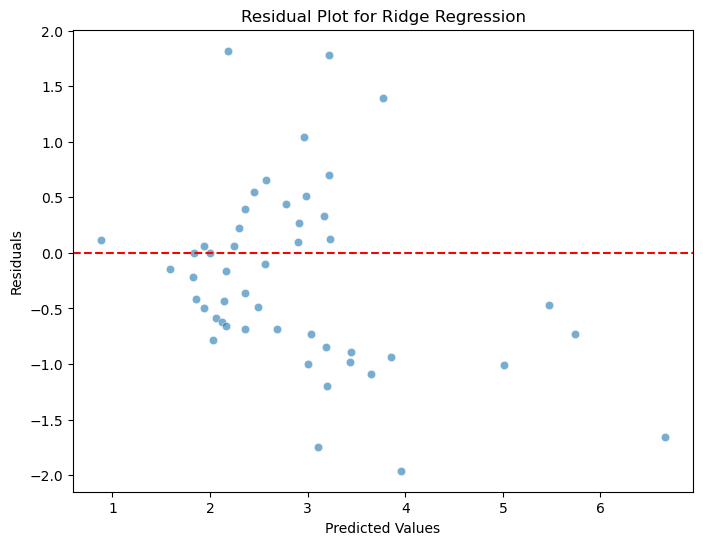

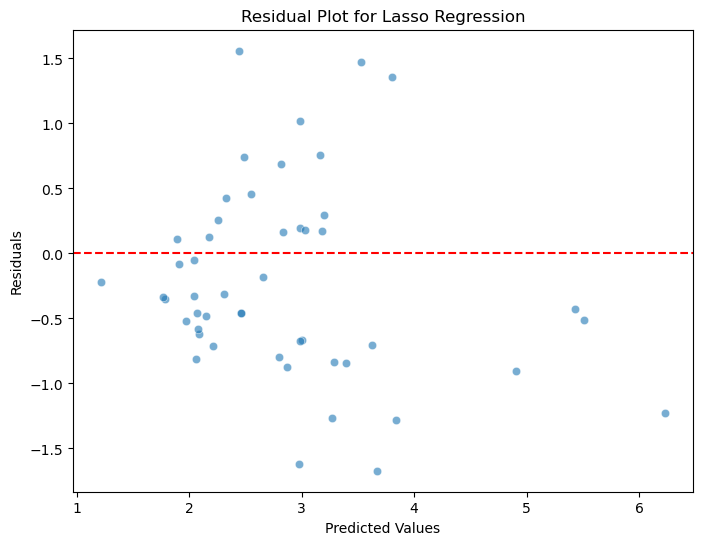

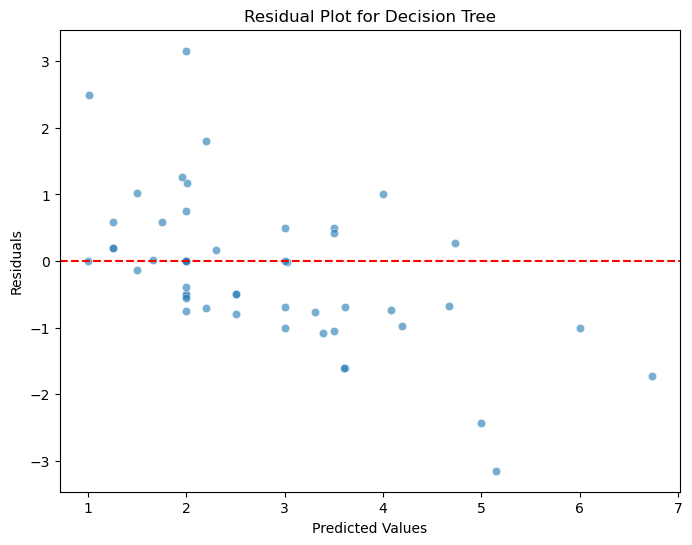

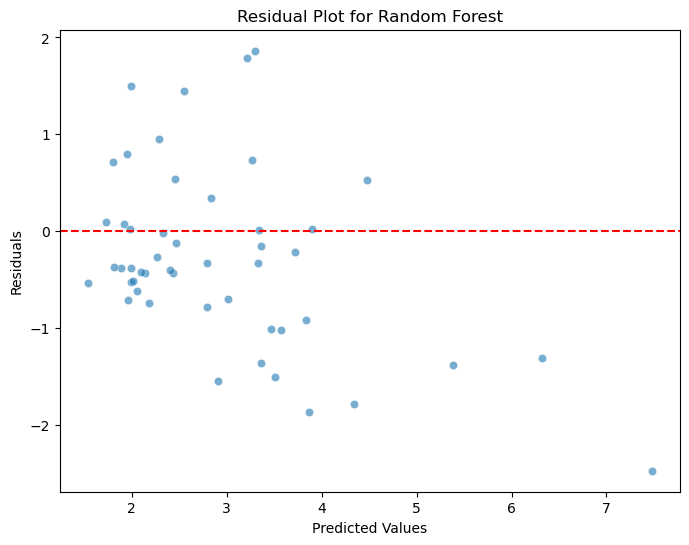

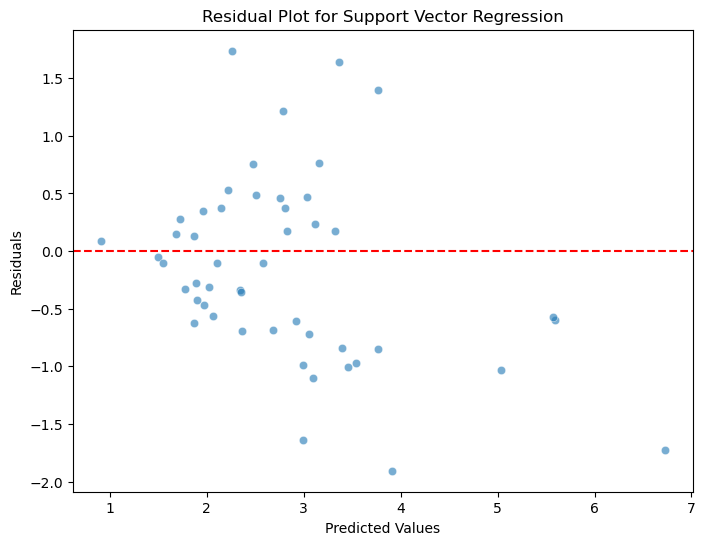

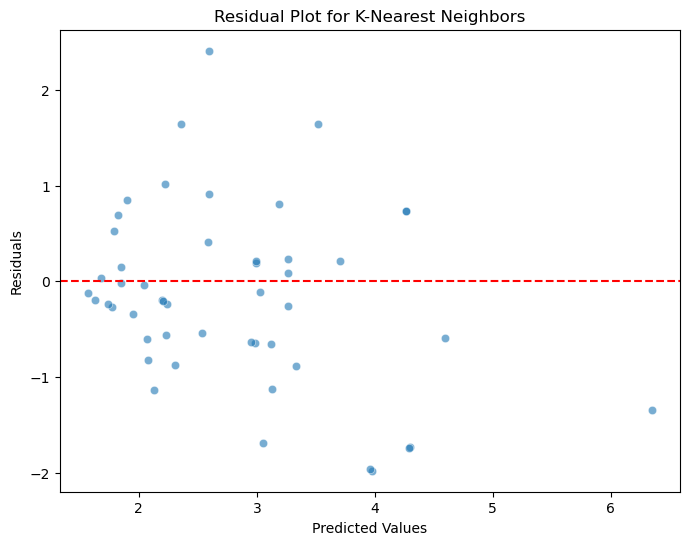

In [21]:

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, model_name)

In [22]:

lasso_model = models['Lasso Regression']
lasso_feature_importance = pd.Series(lasso_model.coef_, index=X.columns)
lasso_significant_features = lasso_feature_importance[lasso_feature_importance != 0].sort_values(ascending=False)
print("\nKey Influential Features in Lasso Regression:\n", lasso_significant_features)


Key Influential Features in Lasso Regression:
 size          0.108081
total_bill    0.099099
dtype: float64


In [23]:

forest_model = models['Random Forest']
forest_feature_importance = pd.Series(forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Contributing Features from Random Forest:\n", forest_feature_importance)


Top Contributing Features from Random Forest:
 total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


In [24]:

print("\nFinal Observations and Suggestions:")
print("- Concentrate efforts on the times and days yielding higher tip amounts to increase overall revenue, such as peak times or weekends.")
print("- Higher priority can be given to tables with larger groups, as these may generate greater tips.")
print("- Assess the relationship between the total bill and tip size to gauge how promoting larger spending could influence tipping.")


Final Observations and Suggestions:
- Concentrate efforts on the times and days yielding higher tip amounts to increase overall revenue, such as peak times or weekends.
- Higher priority can be given to tables with larger groups, as these may generate greater tips.
- Assess the relationship between the total bill and tip size to gauge how promoting larger spending could influence tipping.


In [25]:

from sklearn.model_selection import cross_val_score

# Example for Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV MSE: {np.mean(np.abs(cv_scores))}")


Random Forest CV MSE: 1.1625471168784016


In [26]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# Conclusion

- **Key Factors Influencing Tip Amounts:**
  - Through several rounds of experimentation with different feature sets, we observed that the model's performance, as indicated by R² and accuracy scores, was maximized when focusing solely on the "total_bill" feature. Initially, using all columns except "tips" yielded R² and accuracy scores of 0.527307 and 0.408163, respectively. Using only "size" and "total_bill" achieved similar results. However, using "total_bill" as the sole feature led to the highest scores: an R² of 0.546215 and an accuracy score of 0.448980, with Lasso Regression performing best in this setup. This indicates that "total_bill" is the most significant predictor of tip amounts.

- **Model Performance Comparison:**
  - Among the models tested, Lasso Regression achieved the highest R² (0.546215) and provided the most consistent accuracy, making it the optimal model for tip prediction in this dataset. Ridge and Linear Regression models also performed similarly, with R² values of 0.544938 and 0.544946, respectively, indicating they are reasonably good alternatives.
  - Decision Tree, Random Forest, SVR, and KNN, however, displayed significantly lower R² values, suggesting these models are less suitable for predicting tips accurately in this context.

- **Practical Takeaways for Management:**
  - Since "total_bill" strongly correlates with tips, strategies that encourage higher spending—such as special discounts on premium items—might result in increased tips.
  - Training staff on the impact of total bill size on tipping behavior could enable them to make targeted upselling efforts, which may benefit both revenue and tip amounts. This insight can guide management to implement strategic customer engagement approaches that align with tipping patterns.
